# 보석가격 예측

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('./train.csv', index_col= 0)
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


### 데이터 전처리

In [154]:
# 열 값의 의미
# carat : 보석의 무게
# cut : 등급
# color : 색
# clarity : 투명도
# depth : 깊이
# table : ?
# x, y, z : ?

In [4]:
# 결측치 없음
data.info()
# data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 16.2+ MB


In [5]:
data.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [6]:
data.clarity.unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [7]:
data.color.unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [8]:
# https://gem.easiestip.com/6 참고
# 순서형 데이터를 수치형 데이터로 변환
cut_mapping = {
    'Ideal' : 5,
    'Premium' : 4,
    'Very Good' : 3,
    'Good' : 2,
    'Fair' : 1}

clarity_mapping = {
    'I1' : 1,
    'SI2' : 2,
    'SI1' : 3,
    'VS2' : 4,
    'VS1' : 5,
    'VVS2' : 6,
    'VVS1' : 7,
    'IF' : 8
}

# 다이아몬드 색은 투명일수록 좋은 보석임
color_mapping = {
    'J' : 1,
    'I' : 2,
    'H' : 3,
    'G' : 4,
    'F' : 5,
    'E' : 6,
    'D' : 7
}

In [9]:
data.cut = data.cut.map(cut_mapping)
data.clarity = data.clarity.map(clarity_mapping)
data.color = data.color.map(color_mapping)
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.52,4,5,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,1,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


### 데이터 시각화

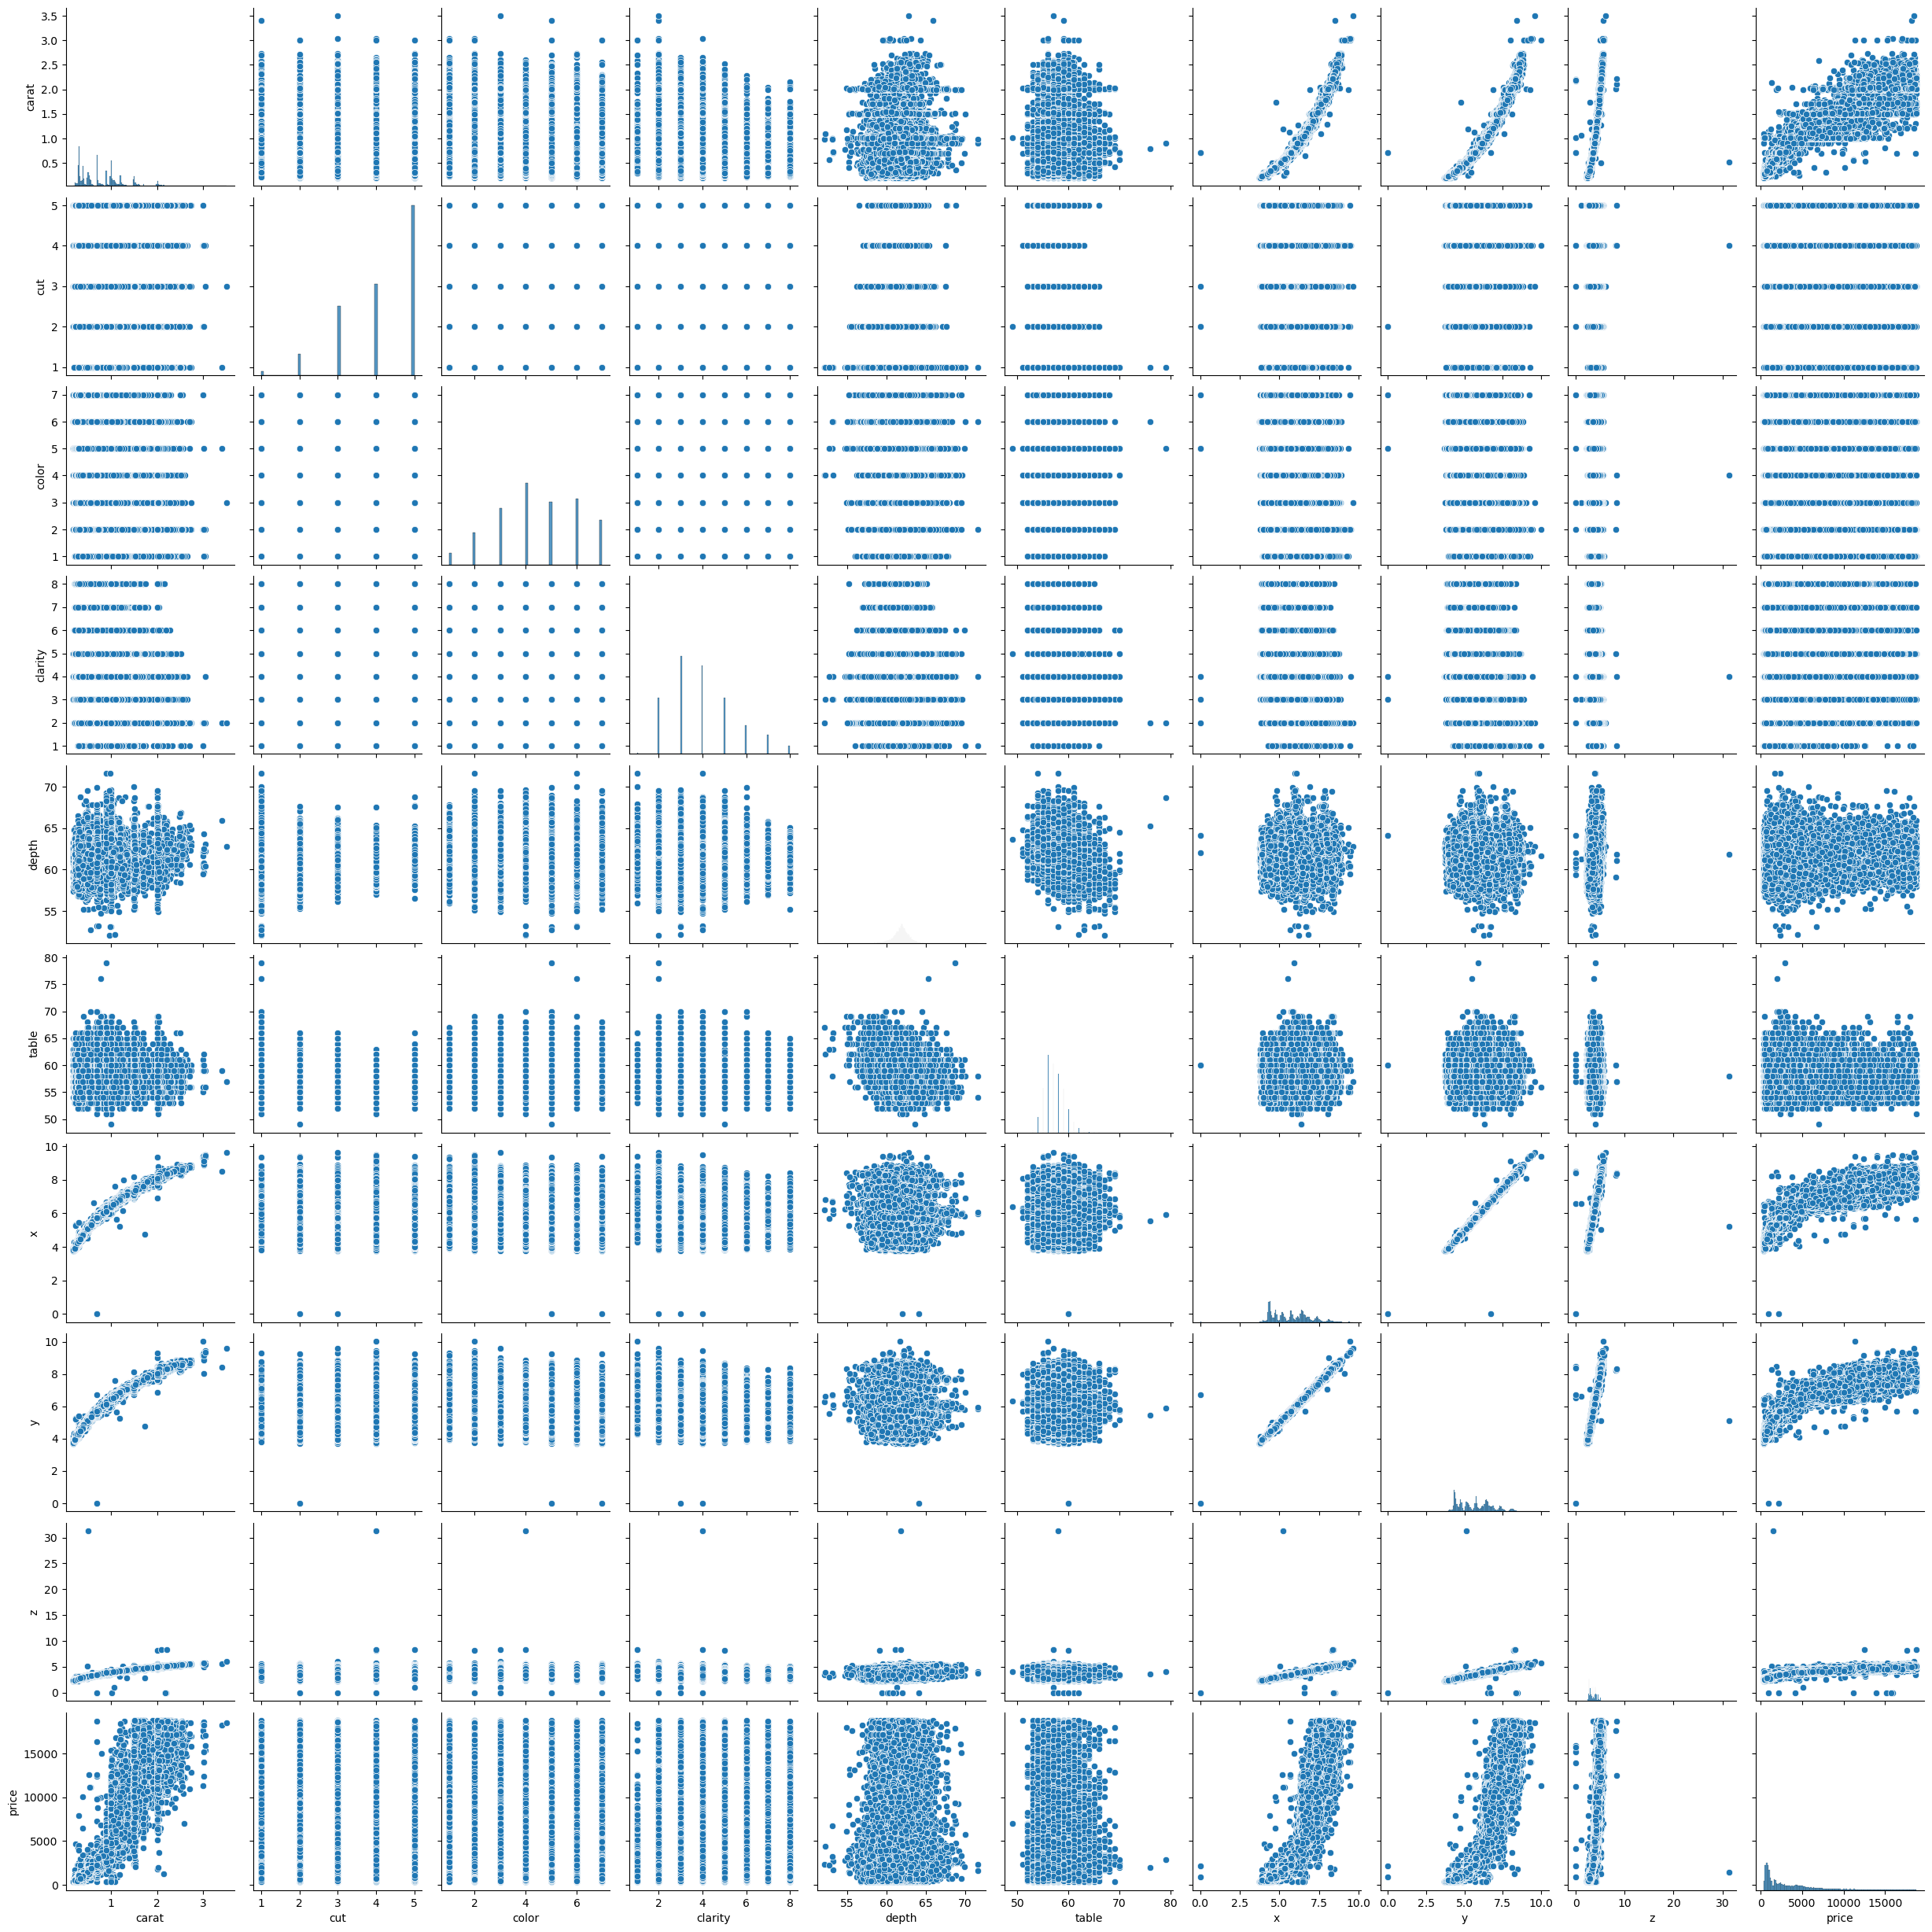

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)

In [10]:
# 상관관계 확인
correlation = data.corr()
correlation

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.150901,-0.292400,-0.348611,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
cut,-0.150901,1.000000,0.022439,0.185145,-0.249720,-0.480481,-0.146743,-0.147164,-0.168376,-0.090948
color,-0.292400,0.022439,1.000000,-0.088333,-0.035517,-0.034978,-0.269394,-0.269509,-0.270132,-0.210859
clarity,-0.348611,0.185145,-0.088333,1.000000,-0.060720,-0.184567,-0.375424,-0.373709,-0.376404,-0.184439
depth,0.027852,-0.249720,-0.035517,-0.060720,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.225737,-0.480481,-0.034978,-0.184567,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,0.980563,-0.146743,-0.269394,-0.375424,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,0.980161,-0.147164,-0.269509,-0.373709,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.974274,-0.168376,-0.270132,-0.376404,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,0.943396,-0.090948,-0.210859,-0.184439,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


<Axes: >

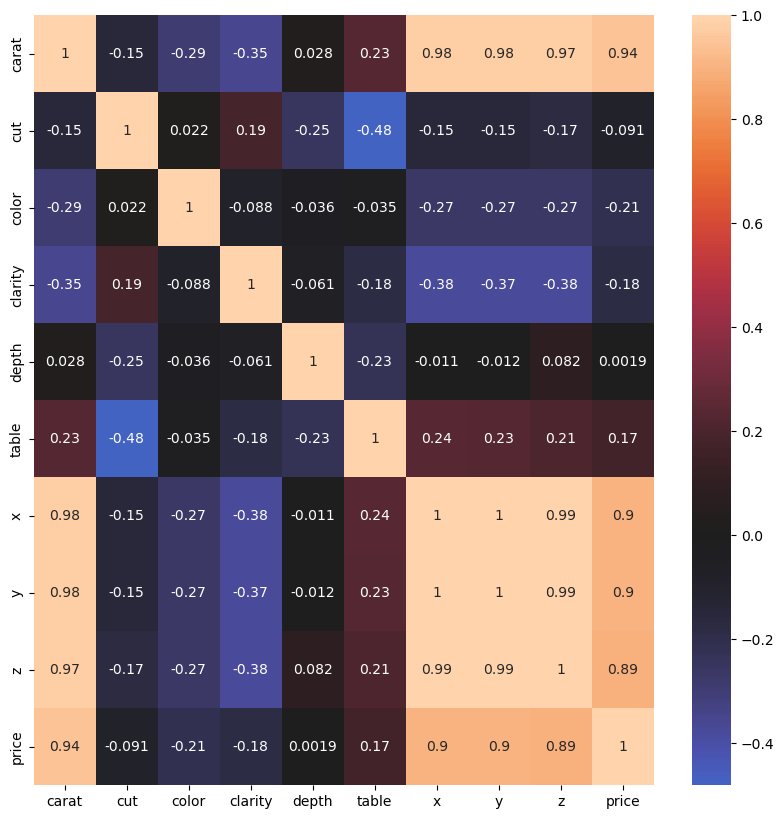

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation,annot=True,center=0)

In [14]:
# x,y,z 의 상관관계가 너무 큼 -> x,y,z 를 하나의 변수로 만들자 -> 무게중심으로 합침
data['xyz'] = round((data['x']+data['y']+data['z']) / 3,3)
data = data.drop(['x', 'y', 'z'], axis = 1)

In [15]:
data.head()

,carat,cut,color,clarity,depth,table,price,xyz
id,,,,,,,,
0,1.52,4,5,4,62.2,58.0,13619,6.383
1,2.03,3,1,2,62.0,58.0,13387,7.077
2,0.70,5,4,5,61.2,57.0,2772,4.973
3,0.32,5,4,5,61.6,56.0,666,3.833
4,1.70,4,4,4,62.6,59.0,14453,6.677


In [16]:
# 상관관계 확인
correlation = data.corr()
correlation

,carat,cut,color,clarity,depth,table,price,xyz
carat,1.000000,-0.150901,-0.292400,-0.348611,0.027852,0.225737,0.943396,0.980888
cut,-0.150901,1.000000,0.022439,0.185145,-0.249720,-0.480481,-0.090948,-0.152348
color,-0.292400,0.022439,1.000000,-0.088333,-0.035517,-0.034978,-0.210859,-0.270157
clarity,-0.348611,0.185145,-0.088333,1.000000,-0.060720,-0.184567,-0.184439,-0.375760
depth,0.027852,-0.249720,-0.035517,-0.060720,1.000000,-0.230631,0.001880,0.010910
table,0.225737,-0.480481,-0.034978,-0.184567,-0.230631,1.000000,0.174915,0.230390
price,0.943396,-0.090948,-0.210859,-0.184439,0.001880,0.174915,1.000000,0.900934
xyz,0.980888,-0.152348,-0.270157,-0.375760,0.010910,0.230390,0.900934,1.000000


<Axes: >

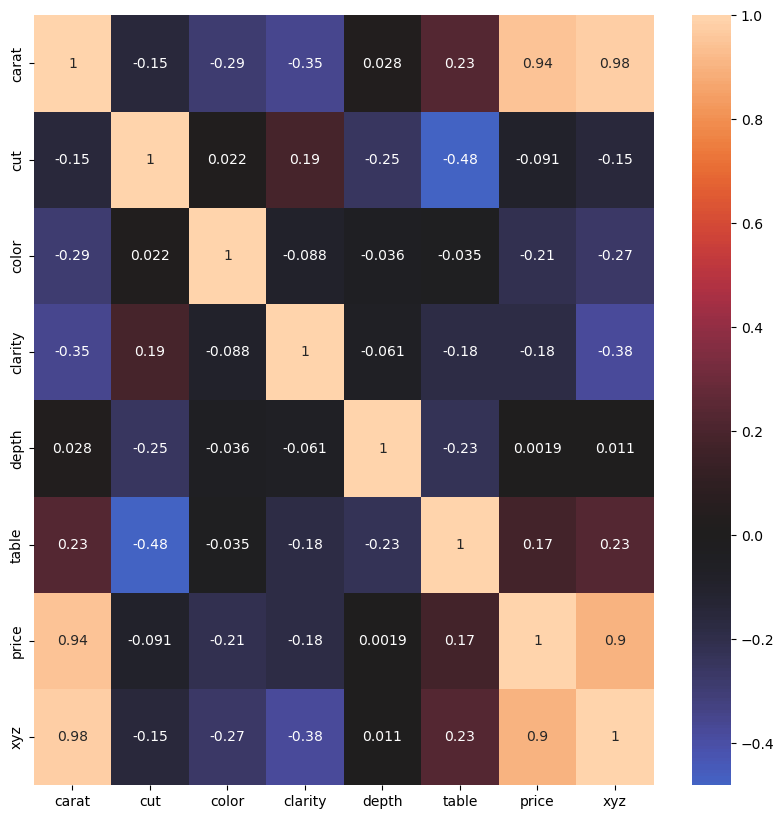

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation,annot=True,center=0)

In [17]:
# carat 과 xyz 상관성이 너무 큼 -> 다중공선성 확인으로 VIF 값이 10이 넘으면 xyz 값 제거
# 변수들 간의 다중공선성을 확인하자
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = data.drop(['price'], axis = 1).columns
vif["VIF"] = [variance_inflation_factor(data.drop(['price'], axis= 1).values, i) for i in range(data.drop(['price'], axis = 1).shape[1])]

print(vif)

  Variable         VIF
0    carat   99.783150
1      cut   19.819306
2    color    9.889086
3  clarity    9.865930
4    depth  807.007175
5    table  696.620413
6      xyz  713.244820


In [170]:
# VIF 값이 큰 게 많네..? 일단 xyz 는 제거, 상관관계 히트맵에서 carat 이랑 강한 양의 상관 관계이므로
data = data.drop(['xyz'], axis = 1)
data.head()

,carat,cut,color,clarity,depth,table,price
id,,,,,,,
0,1.52,4,5,4,62.2,58.0,13619
1,2.03,3,1,2,62.0,58.0,13387
2,0.70,5,4,5,61.2,57.0,2772
3,0.32,5,4,5,61.6,56.0,666
4,1.70,4,4,4,62.6,59.0,14453


### 다중 선형회귀분석

In [171]:
x = data.iloc[:, :-1]
y = data['price']

In [172]:
# 변수 스케일링 적용 -> 변수마다 단위가 다르므로 0 ~ 1로 바꿔주자
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_s = scaler.fit_transform(x)

In [173]:
x = pd.DataFrame(x_s, columns= x.columns)

In [174]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x,y,train_size=0.80)

In [175]:
X_train

,carat,cut,color,clarity,depth,table
146637,-0.779551,0.872951,0.318009,0.682471,0.165874,-0.639801
27684,1.965288,-0.132929,-0.914211,-0.649289,-0.573702,1.444793
76470,0.236255,0.872951,-0.298101,-1.315169,1.367684,-0.639801
155988,1.208836,-0.132929,-2.146431,0.682471,-0.573702,0.923644
155242,0.473997,-1.138809,0.318009,-0.649289,1.182790,0.923644
...,...,...,...,...,...,...
108376,-0.628261,0.872951,0.934119,0.682471,0.905449,-1.160949
2351,-0.563422,0.872951,-0.298101,0.682471,-0.666149,-0.118652
110036,0.992707,0.872951,-0.298101,-0.649289,0.258321,-0.639801
113820,0.473997,0.872951,0.934119,-1.315169,-0.573702,1.444793


In [176]:
# 선형 회귀 분석을 위한 상수항 추가
import statsmodels.api as sm
X_train = sm.add_constant(X_train, has_constant = 'add')
X_test = sm.add_constant(X_test, has_constant = 'add')

In [177]:
# OLS 검정
model = sm.OLS(y_train, X_train)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 3.209e+05
Date:                Tue, 26 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:47:25   Log-Likelihood:            -1.3042e+06
No. Observations:              154858   AIC:                         2.608e+06
Df Residuals:                  154851   BIC:                         2.608e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3969.7125      2.794   1420.588      0.000    3964.235    3975.189
carat       4217.7863      3.225   1307.862      0.000    4211.465    4224.107
cut           83.4842      3.525     23.685      0.000      76.576      90.393
color        440.7250      2.991    147.348      0.000     434.863     446.587
clarity      735.6741      3.092    237.902      0.000     729.613     741.735
depth        -42.0332      3.181    -13.214      0.000     -48.268     -35.799
table        -65.0300      3.570    -18.218      0.000     -72.026     -58.034
==============================================================================
Omnibus:                    32322.894   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           152311.768
Skew:                           0.944   Prob(JB):                         0.00
Kurtosis:                       7.476   Cond. No.                         2.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
y_predict = fitted_model.predict(X_test)

In [180]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Square error :",  mean_squared_error(y_test,y_predict))
print("R2 score :",  r2_score(y_test, y_predict))

Mean Square error : 1232469.4902151874
R2 score : 0.9248494629025694


In [184]:
test = pd.read_csv('./test.csv', index_col= 0)
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
193573,0.35,Ideal,D,VS2,62.3,56.0,4.51,4.54,2.82
193574,0.77,Very Good,F,SI2,62.8,56.0,5.83,5.87,3.68
193575,0.71,Ideal,I,VS2,61.9,53.0,5.77,5.74,3.55
193576,0.33,Ideal,G,VVS2,61.6,55.0,4.44,4.42,2.73
193577,1.20,Very Good,I,VS2,62.7,56.0,6.75,6.79,4.24


In [185]:
# https://gem.easiestip.com/6 참고
# 순서형 데이터를 수치형 데이터로 변환
cut_mapping = {
    'Ideal' : 5,
    'Premium' : 4,
    'Very Good' : 3,
    'Good' : 2,
    'Fair' : 1}

clarity_mapping = {
    'I1' : 1,
    'SI2' : 2,
    'SI1' : 3,
    'VS2' : 4,
    'VS1' : 5,
    'VVS2' : 6,
    'VVS1' : 7,
    'IF' : 8
}

# 다이아몬드 색은 투명일수록 좋은 보석임
color_mapping = {
    'J' : 1,
    'I' : 2,
    'H' : 3,
    'G' : 4,
    'F' : 5,
    'E' : 6,
    'D' : 7
}

test.cut = test.cut.map(cut_mapping)
test.clarity = test.clarity.map(clarity_mapping)
test.color = test.color.map(color_mapping)
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
193573,0.35,5,7,4,62.3,56.0,4.51,4.54,2.82
193574,0.77,3,5,2,62.8,56.0,5.83,5.87,3.68
193575,0.71,5,2,4,61.9,53.0,5.77,5.74,3.55
193576,0.33,5,4,6,61.6,55.0,4.44,4.42,2.73
193577,1.20,3,2,4,62.7,56.0,6.75,6.79,4.24


In [187]:
test = test.drop(['x', 'y', 'z'],axis = 1)

In [191]:
scaler = StandardScaler()
test_s = scaler.fit_transform(test)

In [193]:
test_s = pd.DataFrame(test_s ,columns=test.columns)

In [195]:
test_s.head()

,carat,cut,color,clarity,depth,table
0,-0.949742,0.879113,1.549995,0.013129,0.443860,-0.645999
1,-0.041635,-1.140927,0.316327,-1.316762,0.906718,-0.645999
2,-0.171365,0.879113,-1.534174,0.013129,0.073574,-2.209394
3,-0.992986,0.879113,-0.300506,1.343020,-0.204141,-1.167131
4,0.888093,-1.140927,-1.534174,0.013129,0.814147,-0.645999


In [197]:
test_s = sm.add_constant(test_s, has_constant = 'add')

In [199]:
test_predict = fitted_model.predict(test_s)

In [202]:
submission = pd.read_csv('./sample_submission.csv')
submission.head()

,id,price
0,193573,3969.155
1,193574,3969.155
2,193575,3969.155
3,193576,3969.155
4,193577,3969.155


In [204]:
submission['price'] = test_predict
submission

,id,price
0,193573,753.427116
1,193574,2873.457229
2,193575,2794.418230
3,193576,794.967261
4,193577,6961.548874
...,...,...
129045,322618,5117.691658
129046,322619,3273.481769
129047,322620,6783.019820
129048,322621,8417.078081


In [207]:
submission.to_csv('./submission.csv', index = 0)